## Find vertical and horizontal components of the upwelling current in CNT and 3D experiments


In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
# Functions
def UpwellingVolAvg(Mask,Fld,ztop=30,zbot=36,xups=122,xdowns=238,yshore=267,yopen=228, to=12,tf=19):
    '''Fld : unstaggered field to average
       Mask: C grid mask'''
    
    mask_expand = np.expand_dims(Mask[ztop:zbot,yopen:yshore,xups:xdowns],0)
    mask_expand = mask_expand + np.zeros(Fld[to:tf,ztop:zbot,yopen:yshore,xups:xdowns].shape)

    Fld_small = Fld[to:tf,ztop:zbot,yopen:yshore,xups:xdowns]
    Avg= np.mean(np.mean(np.ma.masked_array(Fld_small,mask = mask_expand),axis=0),axis=0)
    pc = plt.pcolor(Avg,cmap='Spectral')
    plt.colorbar(pc)
    plt.show()
    
    return np.max(Avg[:,57:])


In [5]:
# Functions
def UpwellingSpdAvg(Mask,Vvel,ztop=30,zbot=36,xups=122,xdowns=238,yshore=267,yopen=228, to=12,tf=19):
    '''Uvel : unstaggered U component
       Vvel : unstaggered V component
       Mask: C grid mask'''
    
    mask_expand = np.expand_dims(Mask[ztop:zbot,yopen:yshore,xups:xdowns],0)
    mask_expand = mask_expand + np.zeros(Vvel[to:tf,ztop:zbot,yopen:yshore,xups:xdowns].shape)

    
    spd = Vvel[to:tf,ztop:zbot,yopen:yshore,xups:xdowns]
    AvgSpd= np.mean(np.mean(np.ma.masked_array(spd,mask = mask_expand),axis=0),axis=0)
    pc = plt.pcolor(AvgSpd,cmap='Spectral')
    plt.colorbar(pc)
    plt.show()
    
    return np.max(AvgSpd)


In [6]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


#All experiments in CNT and 3D except no canyon one (run07)
expList = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run13',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20',
          '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run21',
          '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04',
          '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05',
          '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06',
          '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07']


In [7]:
# The grid is the same for all experiments
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc =  CanyonGridOut.variables['RC'] # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')
hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')
rA = rout.getField(CanyonGrid, 'rA')


### Find average vertical velocity and horizontal velocity within the canyon for each run

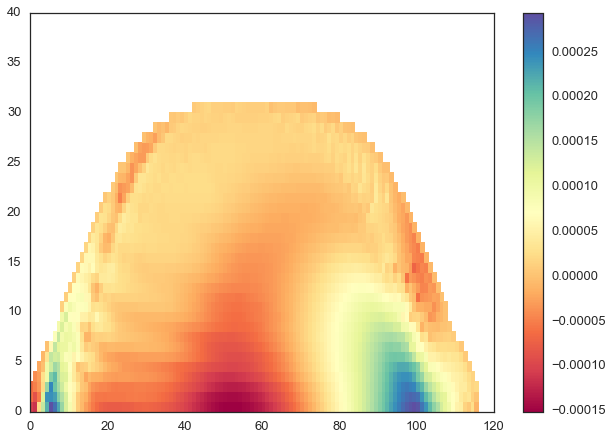

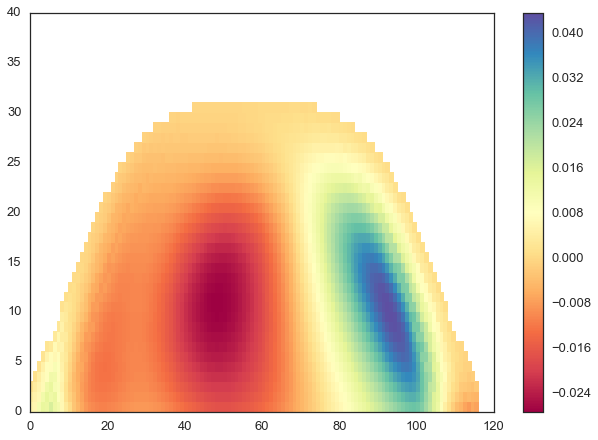

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02
(0, 0.00029400564519511089, 0.043767256041367851)


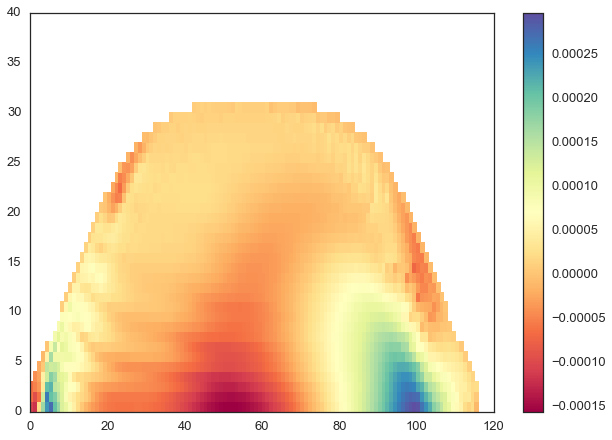

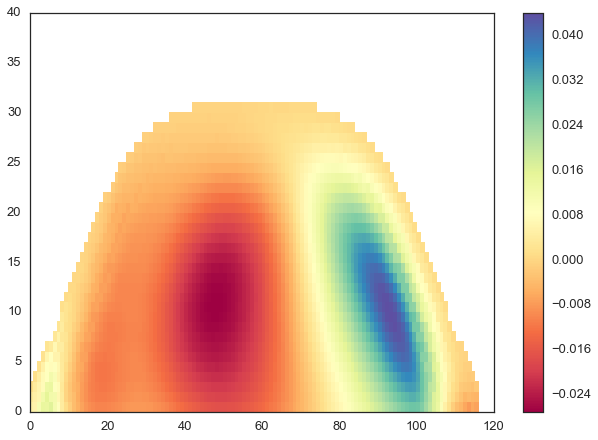

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03
(1, 0.00029725035918610435, 0.044154804377328778)


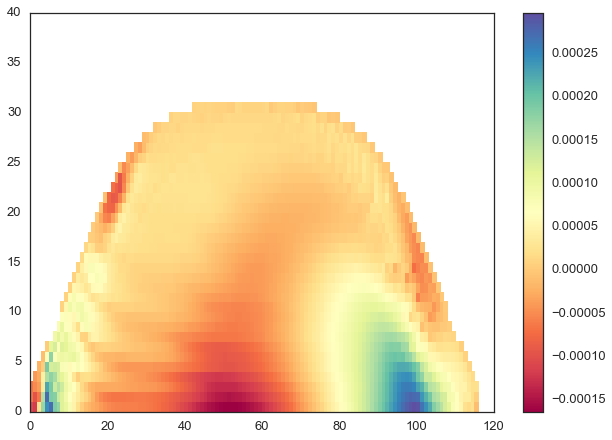

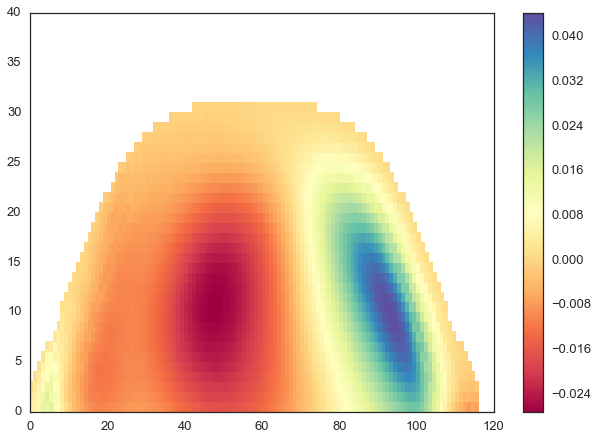

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04
(2, 0.0002971628148640905, 0.044302585933889665)


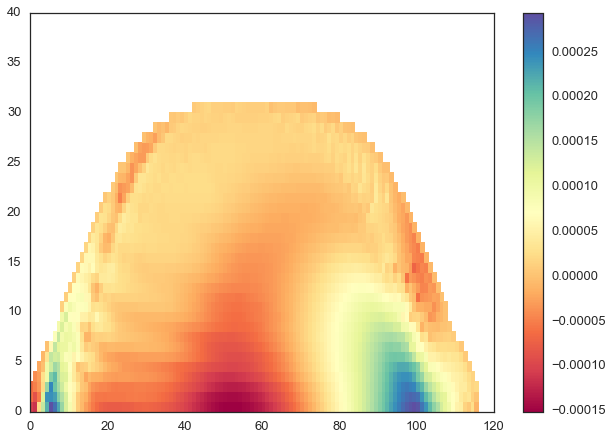

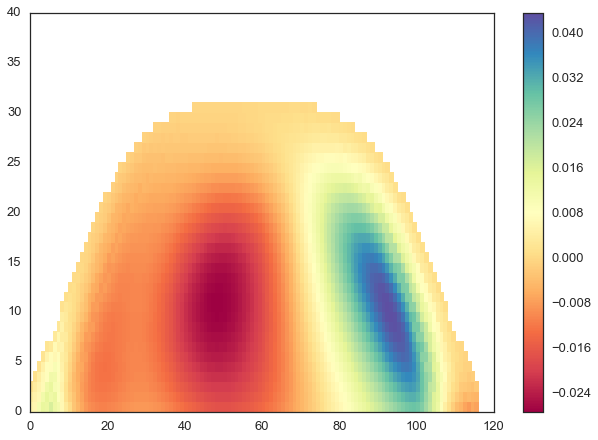

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09
(3, 0.00029400564519511089, 0.043767256041367851)


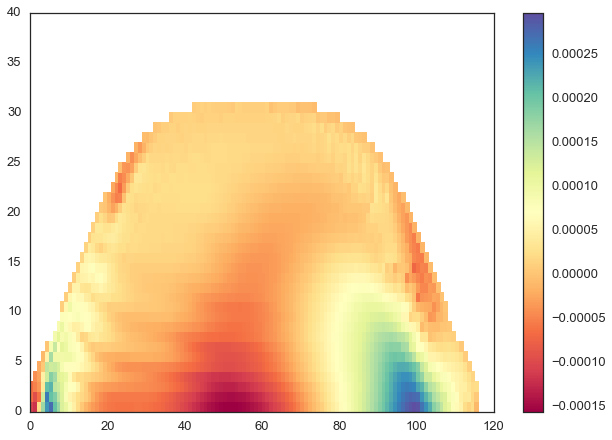

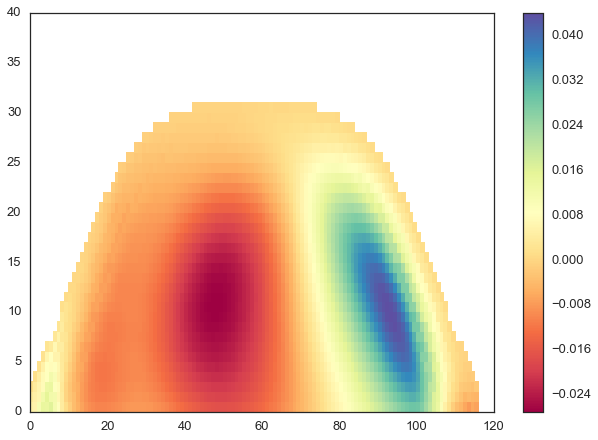

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10
(4, 0.00029725035918610435, 0.044154804377328778)


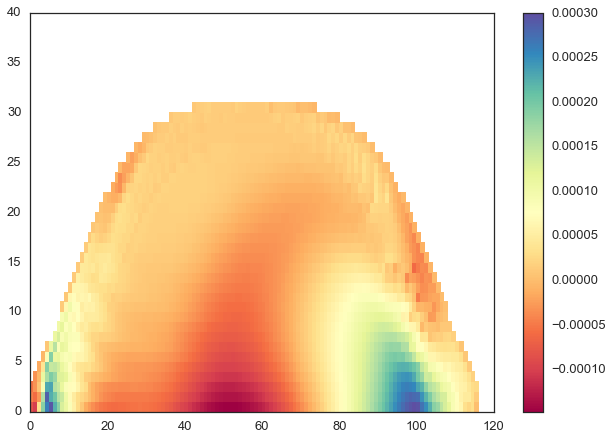

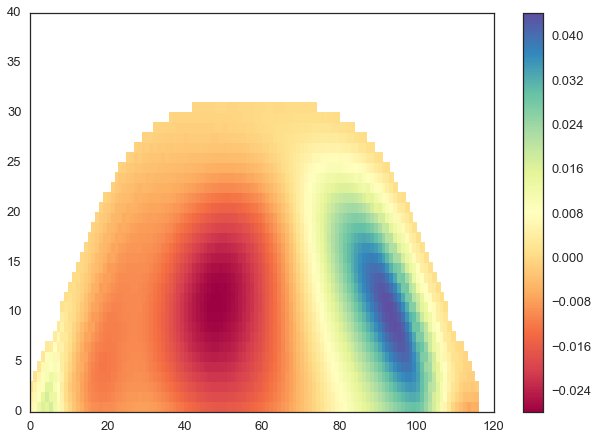

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11
(5, 0.00030043974818129622, 0.044342213443347385)


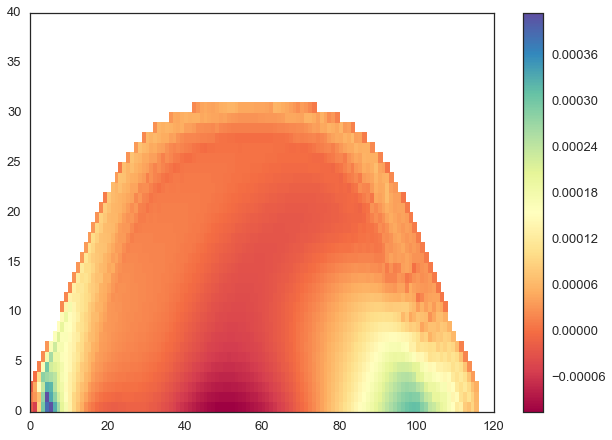

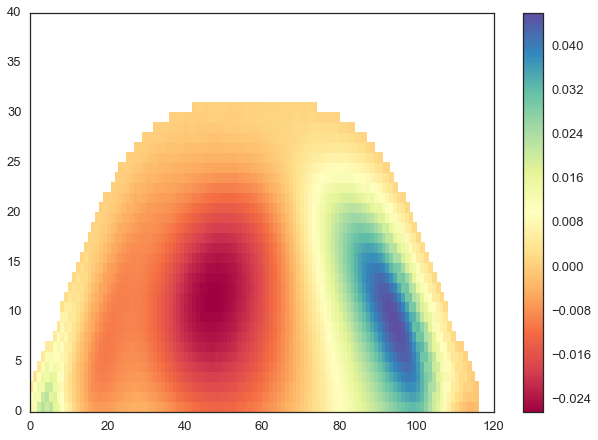

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12
(6, 0.00031360255975631022, 0.04616321587846392)


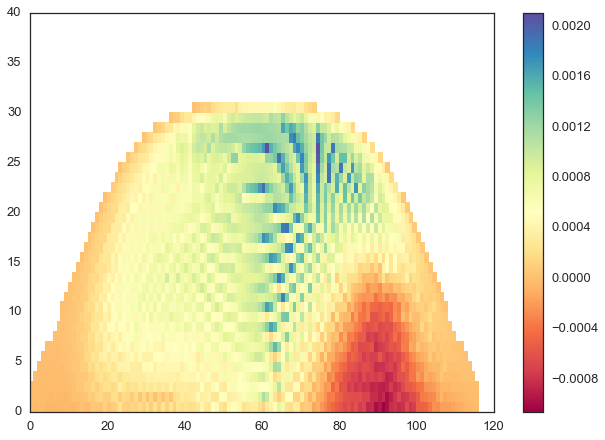

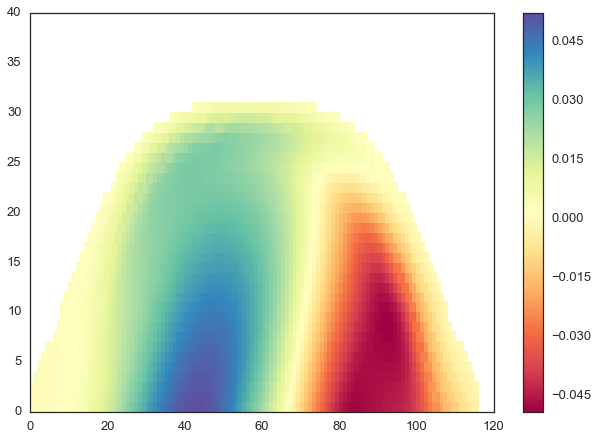

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run13
(7, 0.0021075099440557615, 0.052201605268887119)


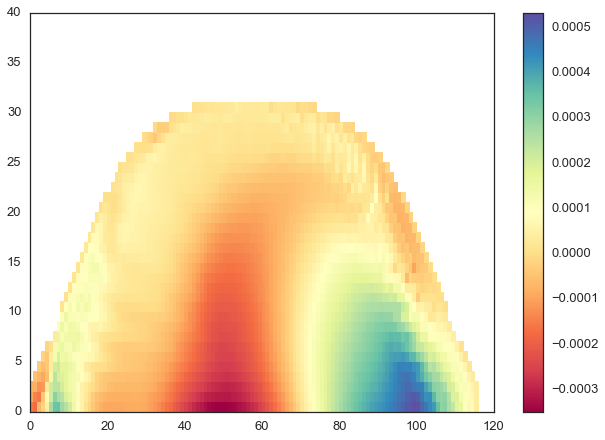

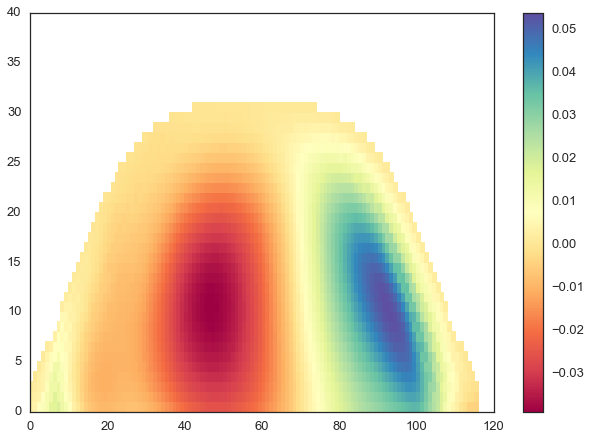

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14
(8, 0.00053274644250493673, 0.053851529246284842)


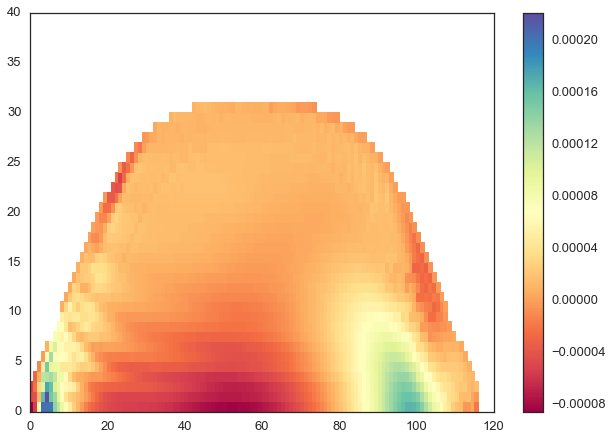

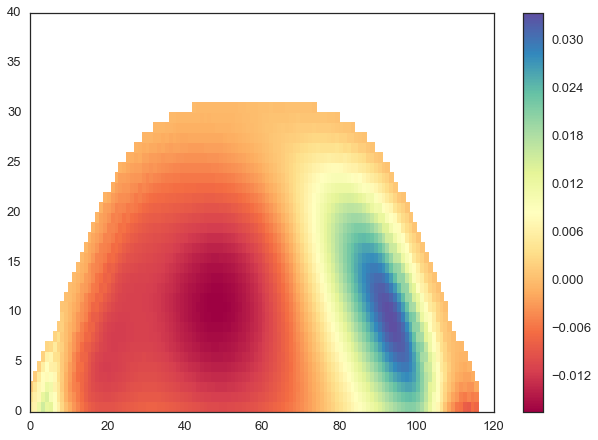

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15
(9, 0.00016744234432865466, 0.033534202547300433)


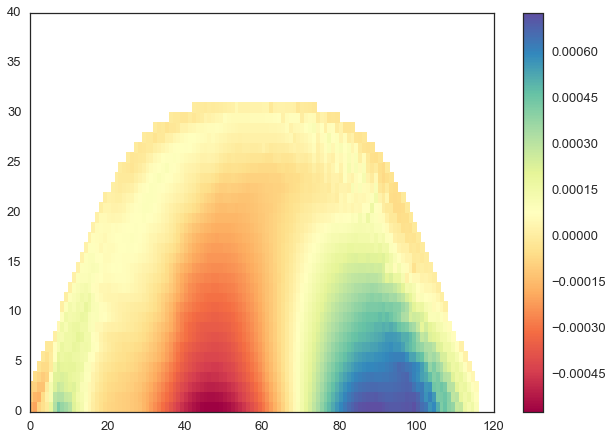

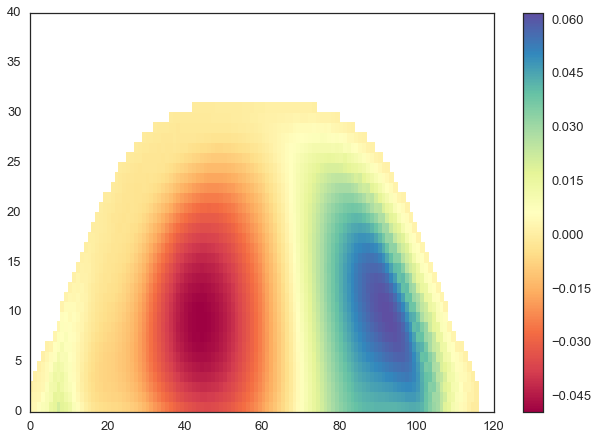

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16
(10, 0.00073134589807263438, 0.062071211990855989)


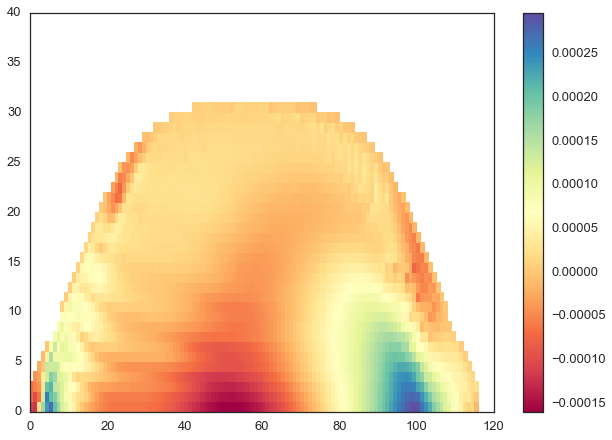

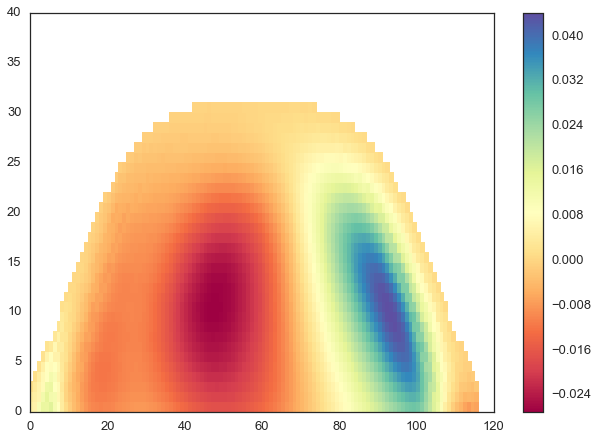

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17
(11, 0.00029691858106248433, 0.044160484558060063)


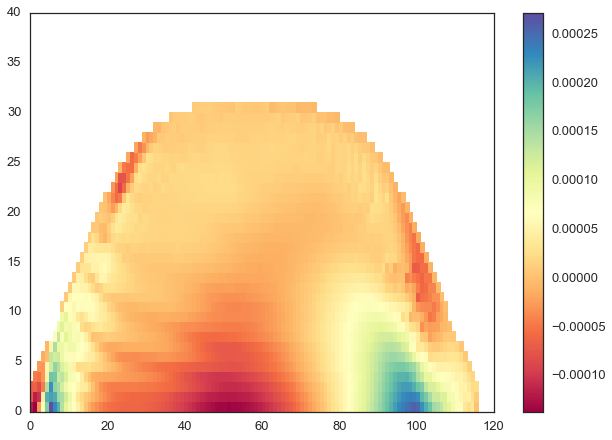

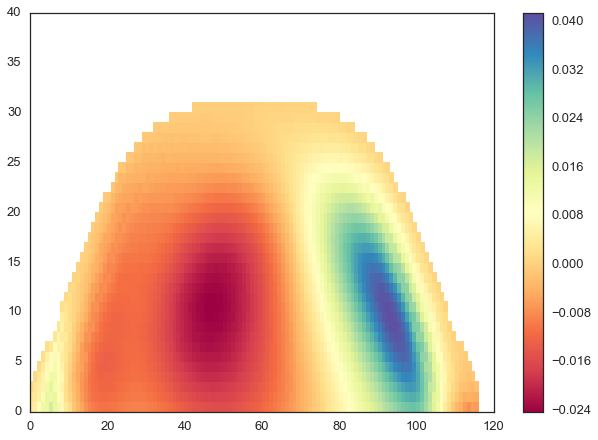

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18
(12, 0.00025837953268949477, 0.041473292878695896)


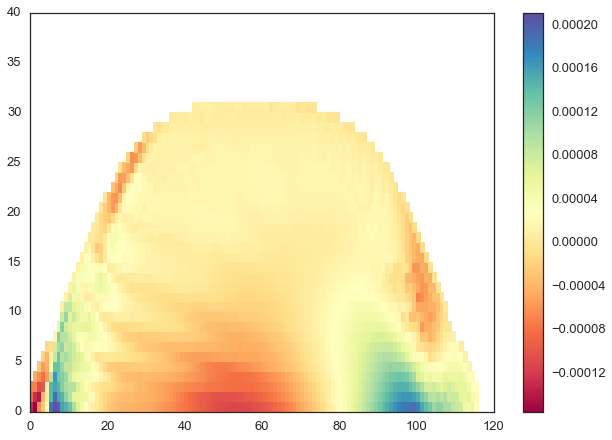

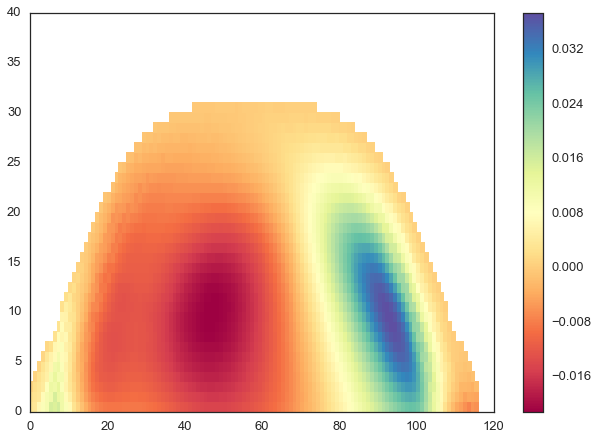

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19
(13, 0.00018882288575349819, 0.037468695924395605)


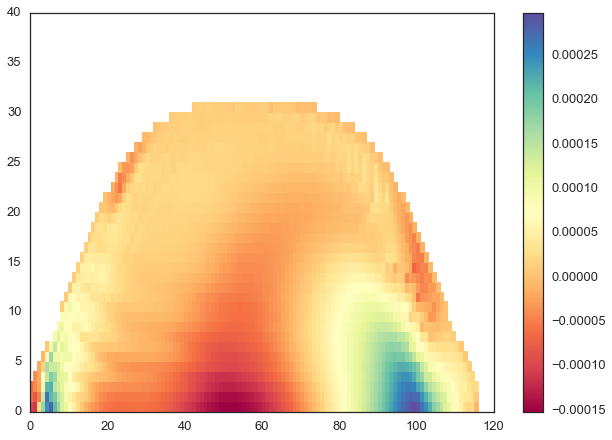

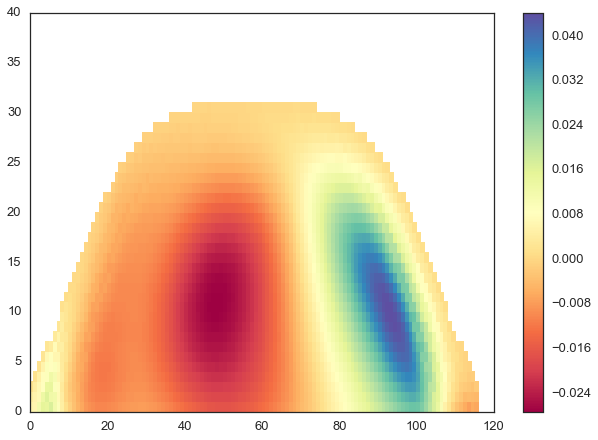

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20
(14, 0.00029829041644309956, 0.044180104065509068)


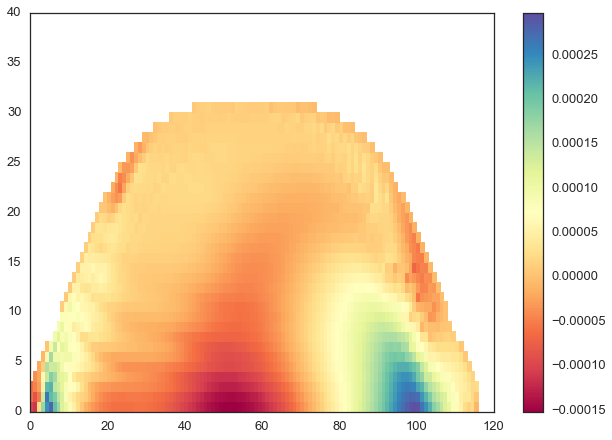

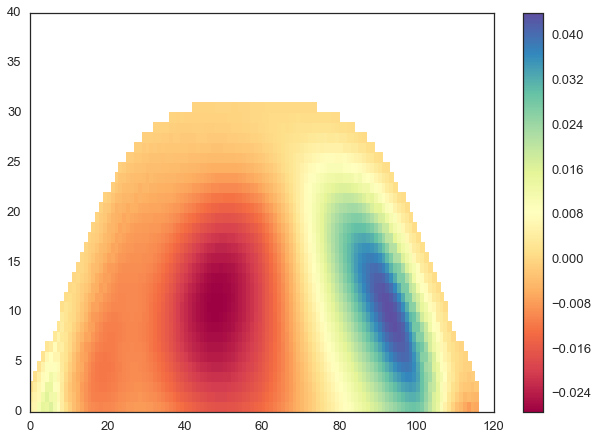

/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run21
(15, 0.00029796498572631254, 0.044166585519200274)


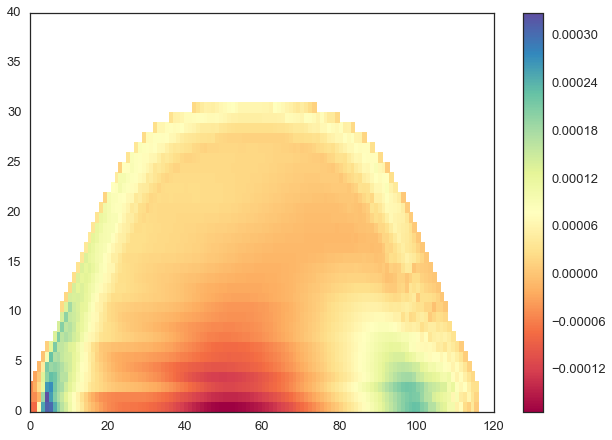

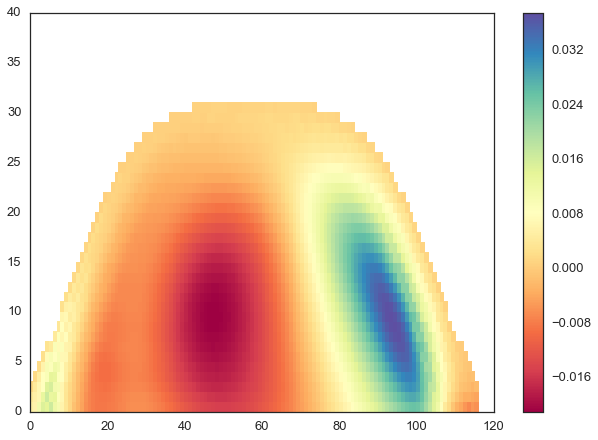

/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04
(16, 0.00022808029427237456, 0.037566153066498888)


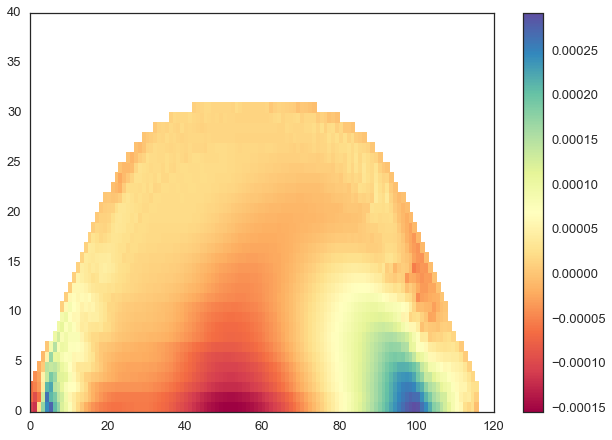

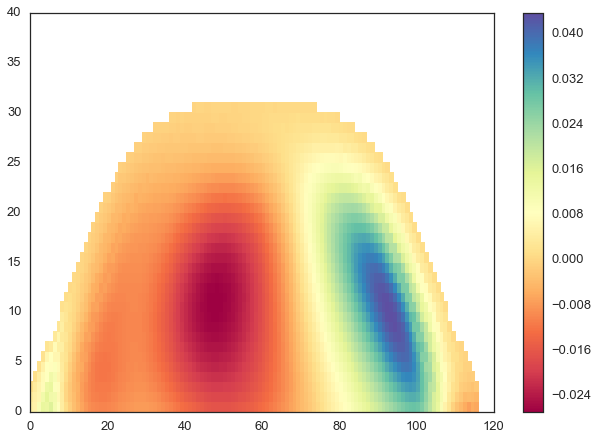

/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05
(17, 0.00029306274483956038, 0.043762356752441035)


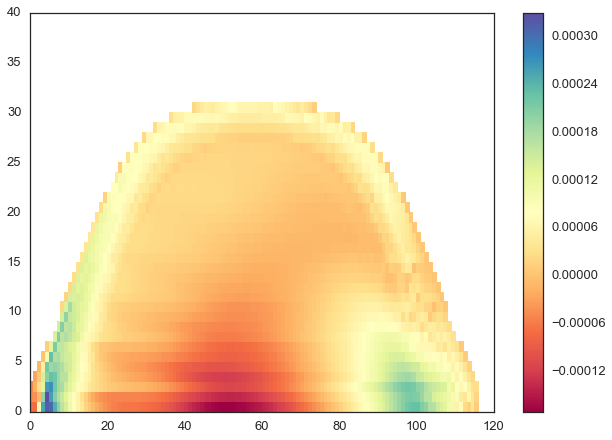

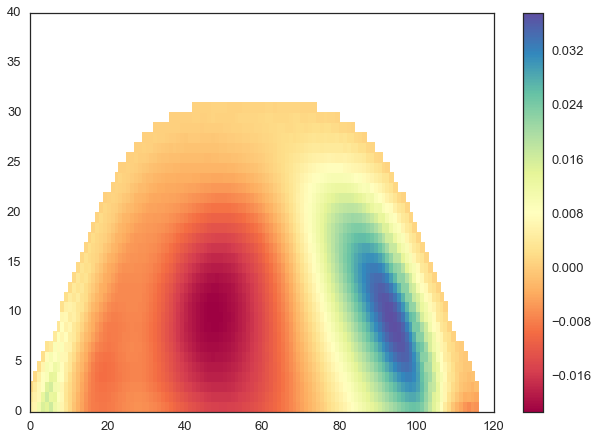

/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06
(18, 0.00022991772718904984, 0.037769344236169546)


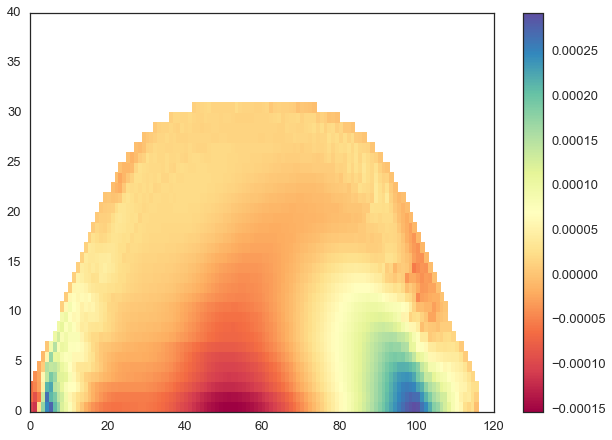

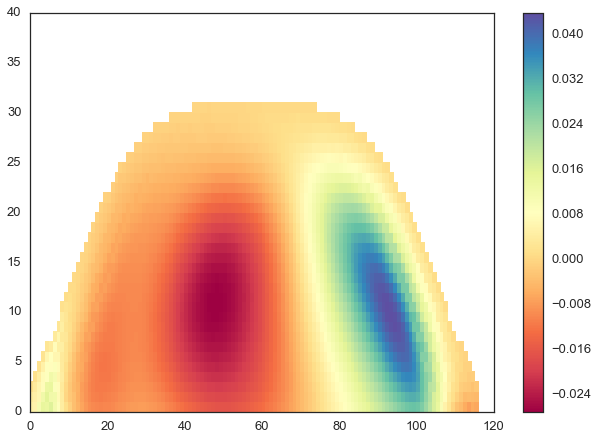

/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07
(19, 0.00029396374953822012, 0.043845107867604212)


In [8]:
Omega = np.zeros(np.shape(expList))
Spd = np.zeros(np.shape(expList))

ii = 0

for exp in expList:
    
    CanyonState= exp +'/stateGlob.nc'
    CanyonStateOut = Dataset(CanyonState)
    z = CanyonStateOut.variables['Z']
    #print(z[37])
    Time = CanyonStateOut.variables['T']
    
    W = rout.getField(CanyonState,'W')
    Ustag = rout.getField(CanyonState,'U')
    Vstag = rout.getField(CanyonState,'V')
    
    U,V = rout.unstagger(Ustag,Vstag)
    
    Omega[ii] = UpwellingVolAvg(MaskC,W)
    Spd[ii] = UpwellingSpdAvg(MaskC,V)
    print(exp)
    print(ii,Omega[ii], Spd[ii])
    
    ii = ii+1


In [9]:
import pandas as pd

raw_data = {'run':expList, 'Omega': Omega, 'Ustar': Spd}

df = pd.DataFrame(raw_data, columns = ['day', 'Omega','Ustar'])
    
filename = ('results/metricsDataFrames/OmegaUstarCNTand3D_tavg_zavg.csv')
df.to_csv(filename)
  


In [13]:
print(Spd)

[ 0.04376726  0.0441548   0.04430259  0.04376726  0.0441548   0.04434221
  0.04616322  0.05220161  0.05385153  0.0335342   0.06207121  0.04416048
  0.04147329  0.0374687   0.0441801   0.04416659  0.03756615  0.04376236
  0.03776934  0.04384511]


In [10]:
rc =  CanyonGridOut.variables['RC']

In [11]:
print(rc[:])

[   -2.5    -7.5   -12.5   -17.5   -22.5   -27.5   -32.5   -37.5   -42.5
   -47.5   -52.5   -57.5   -62.5   -67.5   -72.5   -77.5   -82.5   -87.5
   -92.5   -97.5  -102.5  -107.5  -112.5  -117.5  -122.5  -127.5  -132.5
  -137.5  -142.5  -147.5  -152.5  -157.5  -162.5  -167.5  -175.   -185.
  -195.   -205.   -215.   -225.   -235.   -245.   -255.   -270.   -290.
  -310.   -330.   -350.   -370.   -390.   -410.   -430.   -450.   -470.
  -490.   -510.   -530.   -550.   -570.   -590.   -610.   -630.   -650.
  -670.   -690.   -710.   -730.   -750.   -770.   -790.   -810.   -830.
  -850.   -870.   -890.   -910.   -930.   -950.   -970.   -990.  -1010.
 -1030.  -1050.  -1070.  -1090.  -1110.  -1130.  -1150.  -1170.  -1190. ]
